# ABC analysis of backery sales

In [1]:
import pandas as pd
import numpy as np
import squarify 
import matplotlib.pyplot as plt 

In [2]:
backery_sales = pd.read_csv(r"C:\Users\Anastasia\projects\DataAnalysis\DA Portdolio\ABC_analysis\Bakery sales.csv", encoding='UTF-8')
backery_sales.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [3]:
backery_sales.dtypes

Unnamed: 0         int64
date              object
time              object
ticket_number    float64
article           object
Quantity         float64
unit_price        object
dtype: object

In [4]:
f"The dataset provides the daily transaction details of customer transactions from {min(backery_sales['date'])} to {max(backery_sales['date'])}."

'The dataset provides the daily transaction details of customer transactions from 2021-01-02 to 2022-09-30.'

In [5]:
f"Backery offers {backery_sales['article'].nunique()} different products to clients"

'Backery offers 149 different products to clients'

In [6]:
# Backery offers the following products
backery_sales['article'].unique()

array(['BAGUETTE', 'PAIN AU CHOCOLAT', 'PAIN', 'TRADITIONAL BAGUETTE',
       'CROISSANT', 'BANETTE', 'BANETTINE', 'SPECIAL BREAD', 'COUPE',
       'SAND JB EMMENTAL', 'KOUIGN AMANN', 'BOULE 200G', 'BOULE 400G',
       'GAL FRANGIPANE 6P', 'CAMPAGNE', 'MOISSON', 'CAFE OU EAU',
       'BRIOCHE', 'CEREAL BAGUETTE', 'SEIGLE', 'COMPLET',
       'DIVERS PATISSERIE', 'GAL FRANGIPANE 4P', 'COOKIE', 'FICELLE',
       'PAIN AUX RAISINS', 'GAL POMME 6P', 'GAL POMME 4P', 'FINANCIER X5',
       'VIK BREAD', 'DIVERS VIENNOISERIE', 'GACHE', 'SANDWICH COMPLET',
       'PAIN BANETTE', 'GRAND FAR BRETON', 'QUIM BREAD',
       'SPECIAL BREAD KG', 'GD KOUIGN AMANN', 'BOULE POLKA',
       'DEMI BAGUETTE', 'CHAUSSON AUX POMMES', 'BAGUETTE GRAINE',
       'DIVERS CONFISERIE', 'SUCETTE', 'DIVERS BOULANGERIE',
       'BOISSON 33CL', 'PATES', 'FORMULE SANDWICH', 'DIVERS SANDWICHS',
       'CROISSANT AMANDES', 'PAIN CHOCO AMANDES', 'SACHET VIENNOISERIE',
       'NANTAIS', 'CHOCOLAT', 'PAIN S/SEL', 'FONDANT CHOC

In [7]:
# check missing values
backery_sales.isna().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

In [8]:
# drop unusuful colomns
backery_sales = backery_sales.drop(['Unnamed: 0'],axis=1)

In [9]:
# convert unit_price to numberic 
backery_sales['unit_price'] = backery_sales['unit_price'].str.replace(" €", '').str.replace(',', '.').astype(float)

backery_sales['unit_price'].describe()

count    234005.000000
mean          1.662195
std           1.722720
min           0.000000
25%           1.100000
50%           1.200000
75%           1.500000
max          60.000000
Name: unit_price, dtype: float64

In [10]:
# there are some articles with price 0.0. perhaps they come as a gift with a large purchase or its free for every n-th perchase
# for regular customers
backery_sales[backery_sales['unit_price'] == 0]

,date,time,ticket_number,article,Quantity,unit_price
78,2021-01-02,10:51,150079.0,DIVERS PATISSERIE,1.0,0.0
10373,2021-02-19,10:13,156355.0,DIVERS BOULANGERIE,1.0,0.0
15360,2021-03-04,12:32,159219.0,.,2.0,0.0
15946,2021-03-05,18:18,159538.0,GD FAR BRETON,1.0,0.0
19904,2021-03-18,12:59,161853.0,.,1.0,0.0
24959,2021-04-04,09:53,164878.0,.,1.0,0.0
33569,2021-04-27,16:48,170079.0,.,1.0,0.0
34671,2021-05-01,10:17,170776.0,DIVERS PATISSERIE,1.0,0.0
39840,2021-05-13,11:15,173793.0,DIVERS CONFISERIE,1.0,0.0
61792,2021-07-10,13:25,186662.0,.,2.0,0.0


In [11]:
# rename columns for consistency
backery_sales = backery_sales.rename(columns={'Quantity': 'quantity'})
backery_sales.head(1)

,date,time,ticket_number,article,quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.9


In [12]:
# create new column 'total_price' to calculate total revenue by article
backery_sales['total_price'] = backery_sales['quantity'] * backery_sales['unit_price']
backery_sales.head(2)

,date,time,ticket_number,article,quantity,unit_price,total_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.9,0.9
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.2,3.6


In [13]:
backery_sales_by_article = backery_sales.groupby(['article']).\
agg({'ticket_number': 'nunique', 'quantity': 'sum', 'unit_price': 'mean', 'total_price': 'sum'}).reset_index().round(2).\
sort_values(by=['total_price'], ascending=False).\
rename(columns={'quantity': 'total_quantity', 'ticket_number': 'number_of_orders', 'unit_price': 'avg_unit_price', 'total_price': 'total_revenue'})
backery_sales_by_article = backery_sales_by_article[backery_sales_by_article['avg_unit_price'] > 0]
backery_sales_by_article

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue
140,TRADITIONAL BAGUETTE,67535,117463.0,1.23,144756.05
57,FORMULE SANDWICH,4180,5181.0,6.71,34710.50
32,CROISSANT,11446,29654.0,1.13,33579.50
85,PAIN AU CHOCOLAT,10529,25236.0,1.23,31100.45
7,BANETTE,15107,22732.0,1.08,24555.15
...,...,...,...,...,...
45,DOUCEUR D HIVER,1,1.0,3.00,3.00
143,TROIS CHOCOLAT,1,1.0,3.00,3.00
22,CAKE,1,1.0,3.00,3.00
91,PAIN NOIR,1,1.0,0.60,0.60


### ABC analysis

In [14]:
# abc analysis by revenue and quantity sold
columns = ['total_quantity', 'total_revenue']

for col in columns:
    backery_sales_by_article[f"rel_{col}"] = backery_sales_by_article[col] / sum(backery_sales_by_article[col])
    backery_sales_by_article = backery_sales_by_article.sort_values(f"rel_{col}", ascending=False)
    backery_sales_by_article[f"cumsum_{col}"] = backery_sales_by_article[f"rel_{col}"].cumsum()
    backery_sales_by_article[f"abc_{col}"] = np.where(
        backery_sales_by_article[f"cumsum_{col}"] < 0.8,
        "A",
        np.where(backery_sales_by_article[f"cumsum_{col}"] < 0.95, "B", "C"),
    )

In [15]:
backery_sales_by_article["final_group"] = (
    backery_sales_by_article["abc_total_quantity"] + backery_sales_by_article["abc_total_revenue"])
backery_sales_by_article.head()

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
140,TRADITIONAL BAGUETTE,67535,117463.0,1.23,144756.05,0.326304,0.326304,A,0.259122,0.259122,A,AA
57,FORMULE SANDWICH,4180,5181.0,6.71,34710.50,0.014392,0.718670,A,0.062134,0.321256,A,AA
32,CROISSANT,11446,29654.0,1.13,33579.50,0.082377,0.408681,A,0.060109,0.381365,A,AA
85,PAIN AU CHOCOLAT,10529,25236.0,1.23,31100.45,0.070104,0.478785,A,0.055672,0.437037,A,AA
7,BANETTE,15107,22732.0,1.08,24555.15,0.063148,0.607228,A,0.043955,0.480992,A,AA


In [16]:
groups = backery_sales_by_article.groupby("final_group")["final_group"].agg({"count"}).reset_index()
groups["perc"] = (groups["count"] / sum(groups["count"])*100).round(2)
groups

,final_group,count,perc
0,AA,14,9.52
1,AB,2,1.36
2,BA,9,6.12
3,BB,15,10.20
4,BC,2,1.36
5,CA,2,1.36
6,CB,15,10.20
7,CC,88,59.86


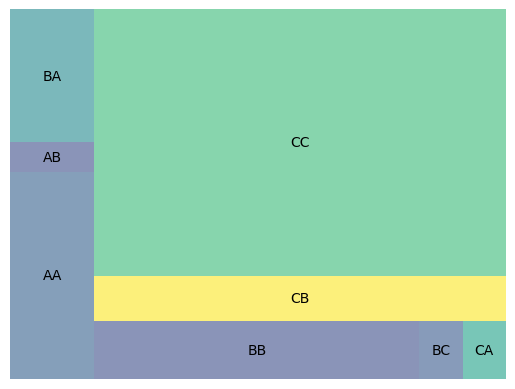

In [17]:
# vazualisation for final groups
sizes=list(groups['perc'])
label=list(groups['final_group'])
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.axis('off')
plt.show()

### 1. AA Group products

In [18]:
# let's have a look at AA products that make up 9.4% of all products and brings the high revenue 
backery_sales_by_article[backery_sales_by_article['final_group'] == 'AA']

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
140,TRADITIONAL BAGUETTE,67535,117463.0,1.23,144756.05,0.326304,0.326304,A,0.259122,0.259122,A,AA
57,FORMULE SANDWICH,4180,5181.0,6.71,34710.50,0.014392,0.718670,A,0.062134,0.321256,A,AA
32,CROISSANT,11446,29654.0,1.13,33579.50,0.082377,0.408681,A,0.060109,0.381365,A,AA
85,PAIN AU CHOCOLAT,10529,25236.0,1.23,31100.45,0.070104,0.478785,A,0.055672,0.437037,A,AA
7,BANETTE,15107,22732.0,1.08,24555.15,0.063148,0.607228,A,0.043955,0.480992,A,AA
4,BAGUETTE,15273,22053.0,0.93,20481.40,0.061262,0.668490,A,0.036663,0.517655,A,AA
126,SPECIAL BREAD,5182,5456.0,2.46,13419.70,0.015156,0.704278,A,0.024022,0.565932,A,AA
135,TARTELETTE,2830,5020.0,2.06,10333.80,0.013945,0.732616,A,0.018498,0.625544,A,AA
25,CEREAL BAGUETTE,4950,7427.0,1.28,9473.40,0.020632,0.689122,A,0.016958,0.642502,A,AA
148,VIK BREAD,3126,3619.0,2.56,9278.60,0.010053,0.788819,A,0.016609,0.659111,A,AA


In [19]:
# Let's see how the prices of products from the AA category compare with prices in general
backery_sales_by_article['avg_unit_price'].describe()

count    147.000000
mean       4.734014
std        5.290360
min        0.150000
25%        1.540000
50%        2.600000
75%        6.000000
max       35.000000
Name: avg_unit_price, dtype: float64

### 2. AB Group products

In [20]:
backery_sales_by_article[backery_sales_by_article['final_group'] == 'AB']

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
30,COOKIE,1989,3779.0,1.05,3972.15,0.010498,0.768615,A,0.007110,0.812473,B,AB
31,COUPE,19424,23505.0,0.15,3525.75,0.065295,0.544080,A,0.006311,0.831669,B,AB


In [21]:
f"The cheapest product in backery is 'COUPE' - a cutting service, total revenue from it is quite small, but this service is in \
{(backery_sales_by_article[backery_sales_by_article['article'] == 'COUPE']['number_of_orders'].values[0] / backery_sales['ticket_number'].nunique() * 100).round(2) }% of all orders"

"The cheapest product in backery is 'COUPE' - a cutting service, total revenue from it is quite small, but this service is in 14.24% of all orders"

A good thing that a cutting servies is available anytime and there is no need to stock up. It’s worth checking the possibility of making the service more marginal and increasing the price, additional data is needed here.
A COOKIE is low-price product, it's cheaper that 25-percentile of average price. In order to increase total revenue can either increase the price if depand is stable or make some discounts for selling for items for e.g.

### 3. BA Group products

In [22]:
backery_sales_by_article[backery_sales_by_article['final_group'] == 'BA']

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
123,SANDWICH COMPLET,2205,2888.0,4.70,13550.0,0.008023,0.850997,B,0.024255,0.541910,A,BA
141,TRAITEUR,1126,1456.0,8.55,12254.3,0.004045,0.928929,B,0.021936,0.587868,A,BA
72,GRAND FAR BRETON,1378,1486.0,7.21,10713.5,0.004128,0.924885,B,0.019178,0.607046,A,BA
14,BRIOCHE,1656,1702.0,5.42,9222.0,0.004728,0.920757,B,0.016508,0.675619,A,BA
79,MOISSON,3095,3362.0,2.06,6915.0,0.009339,0.817437,B,0.012378,0.743838,A,BA
122,SAND JB EMMENTAL,1502,1792.0,3.70,6629.0,0.004978,0.916029,B,0.011866,0.755704,A,BA
75,KOUIGN AMANN,1330,2383.0,2.17,5182.5,0.006620,0.872035,B,0.009277,0.775352,A,BA
87,PAIN BANETTE,2725,3021.0,1.46,4403.3,0.008392,0.842975,B,0.007882,0.783234,A,BA
51,FINANCIER X5,1017,1263.0,3.27,4128.5,0.003509,0.939927,B,0.007390,0.798239,A,BA


### 4. BB Group products

In [23]:
backery_sales_by_article[backery_sales_by_article['final_group'] == 'BB']

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
86,PAIN AUX RAISINS,1986,2729.0,1.46,3979.80,0.007581,0.858578,B,0.007124,0.805363,B,BB
11,BOULE 200G,2685,3080.0,1.14,3496.40,0.008556,0.834582,B,0.006259,0.837928,B,BB
33,CROISSANT AMANDES,1802,2345.0,1.46,3436.00,0.006514,0.878549,B,0.006151,0.844079,B,BB
88,PAIN CHOCO AMANDES,1482,1905.0,1.56,2970.50,0.005292,0.900678,B,0.005317,0.849396,B,BB
84,PAIN,1917,2461.0,1.20,2948.25,0.006836,0.865415,B,0.005278,0.854674,B,BB
26,CHAUSSON AUX POMMES,1440,1936.0,1.46,2827.40,0.005378,0.895386,B,0.005061,0.864881,B,BB
9,BOISSON 33CL,1468,1872.0,1.50,2808.00,0.005200,0.905878,B,0.005026,0.869908,B,BB
96,PARIS BREST,913,1274.0,2.08,2642.80,0.003539,0.936419,B,0.004731,0.874638,B,BB
125,SEIGLE,1325,1422.0,1.86,2639.70,0.003950,0.932880,B,0.004725,0.879364,B,BB
6,BAGUETTE GRAINE,1500,1862.0,1.33,2469.40,0.005173,0.911051,B,0.004420,0.888456,B,BB


### 5. BC Group products

In [24]:
backery_sales_by_article[backery_sales_by_article['final_group'] == 'BC']

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
37,DEMI BAGUETTE,1144,1145.0,0.47,538.45,0.003181,0.943108,B,0.000964,0.985971,C,BC
129,SUCETTE,523,1061.0,0.30,318.30,0.002947,0.949047,B,0.000570,0.990080,C,BC


Both items are cheap and nit very popular, however DEMI BAGUETTE is half of BAGUETTE and for this product there is no need to make additional stocks, half of the baguette can be sold at any time to those customers who need it. For example, people living alone may appreciate this opportunity by purchasing additional items from the bakery. It would be good to further investigate what products are purchased by customers who have half a baguette in their order. Perhaps these are quite loyal customers and this product should not be removed from the range. SUCETTE - a lolipop can be sold to clients with children as a spontaneous purchase at the checkout, may be it will be good to add more marginal items of candies for children in the checkout.

### 6. CA Group products

In [25]:
backery_sales_by_article[backery_sales_by_article['final_group'] == 'CA']

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
69,GD KOUIGN AMANN,832,1009.0,7.99,8064.00,0.002803,0.954772,C,0.014435,0.704540,A,CA
44,DIVERS VIENNOISERIE,818,832.0,5.11,4253.65,0.002311,0.957084,C,0.007614,0.790848,A,CA


### 7. CB Group products

In [26]:
backery_sales_by_article[backery_sales_by_article['final_group'] == 'CB']

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
134,TARTE FRUITS 6P,272,283.0,12.76,3608.00,0.000786,0.986463,C,0.006459,0.818932,B,CB
133,TARTE FRUITS 4P,358,380.0,9.45,3590.00,0.001056,0.981266,C,0.006426,0.825358,B,CB
42,DIVERS PATISSERIE,480,536.0,5.53,2874.95,0.001489,0.968382,C,0.005146,0.859820,B,CB
138,TARTELETTE FRAISE,488,805.0,3.24,2610.00,0.002236,0.959320,C,0.004672,0.884036,B,CB
108,PT NANTAIS,476,751.0,3.25,2453.00,0.002086,0.963604,C,0.004391,0.892847,B,CB
102,PLAT 7.60E,244,320.0,7.60,2432.00,0.000889,0.983110,C,0.004353,0.897200,B,CB
132,TARTE FRAISE 6P,125,120.0,19.51,2343.00,0.000333,0.994080,C,0.004194,0.901395,B,CB
127,SPECIAL BREAD KG,460,457.0,4.92,2246.60,0.001270,0.976646,C,0.004022,0.909546,B,CB
78,MILLES FEUILLES,764,1052.0,2.13,2236.50,0.002922,0.951970,C,0.004003,0.913550,B,CB
131,TARTE FRAISE 4PER,149,165.0,12.87,2118.00,0.000458,0.990730,C,0.003791,0.925152,B,CB


In [27]:
backery_sales_by_article[backery_sales_by_article['final_group'] == 'CB'][backery_sales_by_article['avg_unit_price'] > backery_sales_by_article['avg_unit_price'].mean()].shape[0]

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_14844\4151752199.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  backery_sales_by_article[backery_sales_by_article['final_group'] == 'CB'][backery_sales_by_article['avg_unit_price'] > backery_sales_by_article['avg_unit_price'].mean()].shape[0]


8

### 8. CС Group products

In [28]:
pd.set_option('display.max_rows', None)
backery_sales_by_article[backery_sales_by_article['final_group'] == 'CC']

,article,number_of_orders,total_quantity,avg_unit_price,total_revenue,rel_total_quantity,cumsum_total_quantity,abc_total_quantity,rel_total_revenue,cumsum_total_revenue,abc_total_revenue,final_group
80,NANTAIS,389,591.0,2.67,1557.50,0.001642,0.966893,C,0.002788,0.951353,C,CC
62,GAL FRANGIPANE 6P,121,128.0,12.00,1536.00,0.000356,0.993055,C,0.002750,0.954102,C,CC
116,ROYAL 6P,58,66.0,18.97,1248.00,0.000183,0.997700,C,0.002234,0.956336,C,CC
68,GD FAR BRETON,161,171.0,7.20,1233.50,0.000475,0.990272,C,0.002208,0.958544,C,CC
103,PLAT 8.30E,113,146.0,8.30,1211.80,0.000406,0.991588,C,0.002169,0.960714,C,CC
70,GD NANTAIS,87,109.0,11.11,1209.00,0.000303,0.995325,C,0.002164,0.962878,C,CC
144,TROPEZIENNE,357,508.0,2.07,1050.50,0.001411,0.972682,C,0.001880,0.964758,C,CC
115,ROYAL 4P,57,78.0,12.62,984.00,0.000217,0.997322,C,0.001761,0.966520,C,CC
124,SAVARIN,337,467.0,2.07,968.90,0.001297,0.975376,C,0.001734,0.968254,C,CC
114,ROYAL,174,287.0,3.29,940.00,0.000797,0.985677,C,0.001683,0.969937,C,CC


In [29]:
list(backery_sales_by_article[backery_sales_by_article['final_group'] == 'CC']['article'])

['NANTAIS',
 'GAL FRANGIPANE 6P',
 'ROYAL 6P',
 'GD FAR BRETON',
 'PLAT 8.30E',
 'GD NANTAIS',
 'TROPEZIENNE',
 'ROYAL 4P',
 'SAVARIN',
 'ROYAL',
 'NOIX JAPONAISE',
 'BOULE POLKA',
 'DIVERS SANDWICHS',
 'DIVERS BOULANGERIE',
 'FONDANT CHOCOLAT',
 'GAL POMME 4P',
 'PLAT 7.00',
 'GAL POMME 6P',
 '12 MACARON',
 'GACHE',
 'CHOU CHANTILLY',
 'TARTE FINE',
 'MACARON',
 'PALET BRETON',
 'FRAMBOISIER',
 'ST HONORE',
 'RELIGIEUSE',
 'BAGUETTE APERO',
 'CARAMEL NOIX',
 'VIENNOISE',
 'PAIN S/SEL',
 'GRANDE SUCETTE',
 'SABLE F  P',
 'TRIANGLES',
 'DIVERS BOISSONS',
 'PAILLE',
 'BOTTEREAU',
 'SACHET DE CROUTON',
 'GAL POIRE CHOCO 4P',
 'DELICETROPICAL',
 'GAL POIRE CHOCO 6P',
 'BUCHE 6PERS',
 'BUCHE 4PERS',
 'TARTELETTE CHOC',
 'ENTREMETS',
 'CHOCOLAT',
 'PLATPREPARE7,00',
 'BRIOCHE DE NOEL',
 'BROWNIES',
 'DEMI PAIN',
 'FORMULE PLAT PREPARE',
 'NID DE POULE',
 'REDUCTION SUCREES 12',
 'PAIN DE MIE',
 'BRIOCHETTE',
 'PLAQUE TARTE 25P',
 'TROPEZIENNE FRAMBOISE',
 'MERINGUE',
 'BUCHE 8PERS',
 'ECLAIR

# Monthly sales

In [30]:
monthly_sales = backery_sales

In [31]:
monthly_sales['date_'] = pd.to_datetime(monthly_sales['date'].astype(str), format='%Y-%m-%d')

In [32]:
monthly_sales['month'] = monthly_sales['date_'].dt.month

In [33]:
monthly_sales['year'] = monthly_sales['date_'].dt.year

<Axes: xlabel='month'>

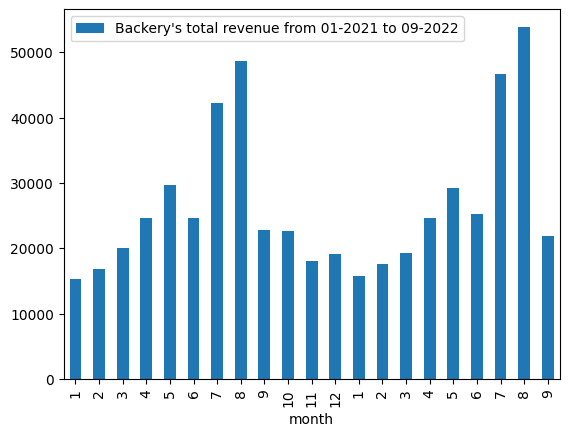

In [34]:
monthly_sales_groupped = monthly_sales.groupby(['year', 'month']).agg({'total_price': 'sum'}).reset_index()
monthly_sales_groupped.plot(kind='bar', y='total_price', x='month', label="Backery's total revenue from 01-2021 to 09-2022")

In [35]:
monthly_sales_groupped

,year,month,total_price
0,2021,1,15258.67
1,2021,2,16827.15
2,2021,3,20087.60
3,2021,4,24649.75
4,2021,5,29617.25
5,2021,6,24610.25
6,2021,7,42201.45
7,2021,8,48680.35
8,2021,9,22728.80
9,2021,10,22704.35


In [36]:
sales_by_month = monthly_sales.groupby(['year', 'month', 'article']).agg({'total_price': 'sum'}).reset_index().rename(columns={'total_price': 'total_revenue'})

sales_by_month = sales_by_month.sort_values(by =['year', 'month', 'total_revenue'], ascending = [True, True, False])

In [37]:
top5_products_by_month = sales_by_month.groupby(['year', 'month']).head(5)
pd.set_option('display.max_rows', None)
top5_products_by_month

,year,month,article,total_revenue
74,2021,1,TRADITIONAL BAGUETTE,3301.20
19,2021,1,CROISSANT,864.60
34,2021,1,FORMULE SANDWICH,858.00
52,2021,1,PAIN AU CHOCOLAT,735.60
36,2021,1,GAL FRANGIPANE 4P,688.00
145,2021,2,TRADITIONAL BAGUETTE,4459.20
96,2021,2,CROISSANT,1060.40
123,2021,2,PAIN AU CHOCOLAT,1015.20
112,2021,2,FORMULE SANDWICH,897.00
79,2021,2,BANETTE,715.05


In [38]:
top5_products_by_month.groupby('article').agg({'total_revenue': 'count'}).sort_values(by='total_revenue', ascending=False)

,total_revenue
article,
CROISSANT,21
FORMULE SANDWICH,21
TRADITIONAL BAGUETTE,21
PAIN AU CHOCOLAT,20
BANETTE,15
TRAITEUR,5
GAL FRANGIPANE 4P,2


The most popular products throught out the year are: CROISSANT,FORMULE SANDWICH, TRADITIONAL BAGUETTE. they are in top-5 products every month. PAIN AU CHOCOLAT is also one of the leaders - in top 5 in 20 out of 21 month. 

In [39]:
#check month then TRAITEUR and GAL FRANGIPANE 4P in top-5 products
top5_products_by_month[top5_products_by_month['article'].isin(['TRAITEUR', 'GAL FRANGIPANE 4P'])]

,year,month,article,total_revenue
36,2021,1,GAL FRANGIPANE 4P,688.00
792,2021,10,TRAITEUR,1325.00
871,2021,11,TRAITEUR,1168.90
962,2021,12,TRAITEUR,1457.75
1039,2022,1,TRAITEUR,1335.95
1001,2022,1,GAL FRANGIPANE 4P,872.00
1118,2022,2,TRAITEUR,1238.80


In [40]:
sales_by_month[sales_by_month['article'] == 'GAL FRANGIPANE 4P'].groupby(['year', 'month']).agg({'total_revenue': 'sum'}).reset_index()

,year,month,total_revenue
0,2021,1,688.0
1,2021,12,144.0
2,2022,1,872.0


<Axes: xlabel='month'>

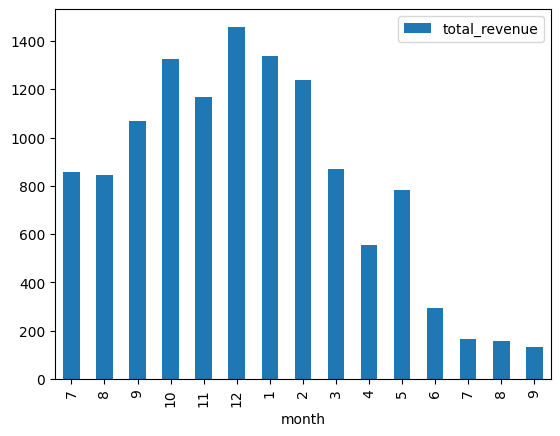

In [41]:
sales_by_month[sales_by_month['article'] == 'TRAITEUR'].groupby(['year', 'month']).agg({'total_revenue': 'sum'}).\
reset_index().plot(kind='bar', y='total_revenue', x='month')

In [42]:
sales_by_month[sales_by_month['article'] == 'TRAITEUR'].groupby(['year', 'month']).agg({'total_revenue': 'sum'})

total_revenue
year month               
2021 7             855.50
     8             845.00
     9            1068.00
     10           1325.00
     11           1168.90
     12           1457.75
2022 1            1335.95
     2            1238.80
     3             871.18
     4             555.80
     5             782.70
     6             295.10
     7             163.62
     8             158.90
     9             132.10

,year,month,article,total_revenue
74,2021,1,TRADITIONAL BAGUETTE,3301.20
19,2021,1,CROISSANT,864.60
34,2021,1,FORMULE SANDWICH,858.00
52,2021,1,PAIN AU CHOCOLAT,735.60
36,2021,1,GAL FRANGIPANE 4P,688.00
3,2021,1,BANETTE,681.45
0,2021,1,BAGUETTE,666.90
37,2021,1,GAL FRANGIPANE 6P,624.00
68,2021,1,SPECIAL BREAD,434.40
40,2021,1,GAL POMME 4P,384.00


,year,month,article,total_revenue
74,2021,1,TRADITIONAL BAGUETTE,3301.20
19,2021,1,CROISSANT,864.60
34,2021,1,FORMULE SANDWICH,858.00
52,2021,1,PAIN AU CHOCOLAT,735.60
36,2021,1,GAL FRANGIPANE 4P,688.00
3,2021,1,BANETTE,681.45
0,2021,1,BAGUETTE,666.90
37,2021,1,GAL FRANGIPANE 6P,624.00
68,2021,1,SPECIAL BREAD,434.40
40,2021,1,GAL POMME 4P,384.00
